In [ ]:
!pip install opendatasets -q

## Importing the dataset 

###### First, we import the marketing analytics from kaggle. The dataset represents a food company that aims to produce the highest profit for the next direct marketing campaign, scheduled for the next month. A pilot campaign involving 2,205 customers was carried out, customers who bought the offer was clearly labeled. The objective of this analysis for is to understand the characteristic and behaviours of those customers.

In [1]:
import opendatasets as od
od.download("https://www.kaggle.com/jackdaoud/marketing-data")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: alizrz
Your Kaggle Key: ········


100%|██████████| 643k/643k [00:00<00:00, 6.31MB/s]

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
sns.set()

In [6]:
Dataset=pd.read_csv("marketing-data/ifood_df.csv")

##### Then we look at the first rows of the dataset to understand the data.

In [7]:
Dataset.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


In [8]:
Dataset.shape

(2205, 39)

##### The dataset has 39 variables and 2205 rows.

In [9]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

##### It seems that all the variables are integer except income which has float type. Also, there is no missing values in any of fields.

In [10]:
Dataset.isnull().sum()

Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegularProds         0
AcceptedCmpO

##### One of the most important thing to check in EDA is the presence of duplicate rows. Duplicate rows can distort the results and therefore should be dropped.

In [18]:
dup=Dataset.duplicated().sum()
print("There are {} duplicate rows in the dataset, which should be dropped".format(dup))


There are 184 duplicate rows in the dataset, which should be dropped


##### So, There are 184 duplicate rows that we need to delete.

In [19]:
Dataset.drop_duplicates(keep=False, inplace=True)


In [20]:
Dataset.describe().round(2)

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
count,1843.00,1843.00,1843.00,1843.00,1843.00,1843.00,1843.00,1843.0,1843.00,1843.00,...,1843.00,1843.00,1843.00,1843.00,1843.0,1843.00,1843.00,1843.00,1843.00,1843.00
mean,51755.75,0.44,0.51,48.73,307.17,26.31,166.81,37.4,27.42,43.84,...,0.24,0.03,0.09,0.02,0.5,0.17,0.22,565.11,521.27,0.31
std,20727.94,0.53,0.55,28.95,337.91,39.73,222.10,54.9,42.07,51.69,...,0.43,0.18,0.29,0.15,0.5,0.37,0.41,577.68,555.77,0.68
min,1730.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,...,0.00,0.00,0.00,0.00,0.0,0.00,0.00,4.00,-283.00,0.00
25%,35683.00,0.00,0.00,24.00,23.50,2.00,16.00,2.5,1.00,9.00,...,0.00,0.00,0.00,0.00,0.0,0.00,0.00,55.00,42.00,0.00
50%,51650.00,0.00,0.00,49.00,179.00,8.00,68.00,12.0,8.00,24.00,...,0.00,0.00,0.00,0.00,1.0,0.00,0.00,344.00,290.00,0.00
75%,68145.00,1.00,1.00,74.00,508.00,33.00,225.00,50.0,34.00,56.00,...,0.00,0.00,0.00,0.00,1.0,0.00,0.00,964.50,883.00,0.00
max,113734.00,2.00,2.00,99.00,1493.00,197.00,1725.00,259.0,262.00,321.00,...,1.00,1.00,1.00,1.00,1.0,1.00,1.00,2491.00,2458.00,4.00


##### At this step, we look at the summary statistics table of our dataset. There are 1843 observations left after deleting the duplicates. It can be seen that on average, people earned 51K while the highest income in the dataset was 114K. Moreover, people spent 562 on avergae, while the highest amount of expenses were 2491. DOB of customers varies from year 1893 to 1996, number of kids at home varies from 0 to maximum of 2,  number of teens at home: 0 to maximum of 2, and the last purchase of customers were made ranging from the day data was taken to 99 days from that time.

##### We also need to do some feature engineering. The number of children can be calculated using "kidhome" and "Teenhome" fields.

In [22]:
Dataset['Numkids']=Dataset['Kidhome'] + Dataset['Teenhome']


### Removing Unnecessary Columns

##### Next, we drop all unnecessary columns to make dataset simple.

In [27]:
Dataset_new= Dataset.drop(['education_2n Cycle','education_Basic','education_Graduation','education_Master','education_PhD',
              'marital_Widow','marital_Together','marital_Single','marital_Married','marital_Divorced',
              'Kidhome','Teenhome'], axis=1)


### Correlation Matrix

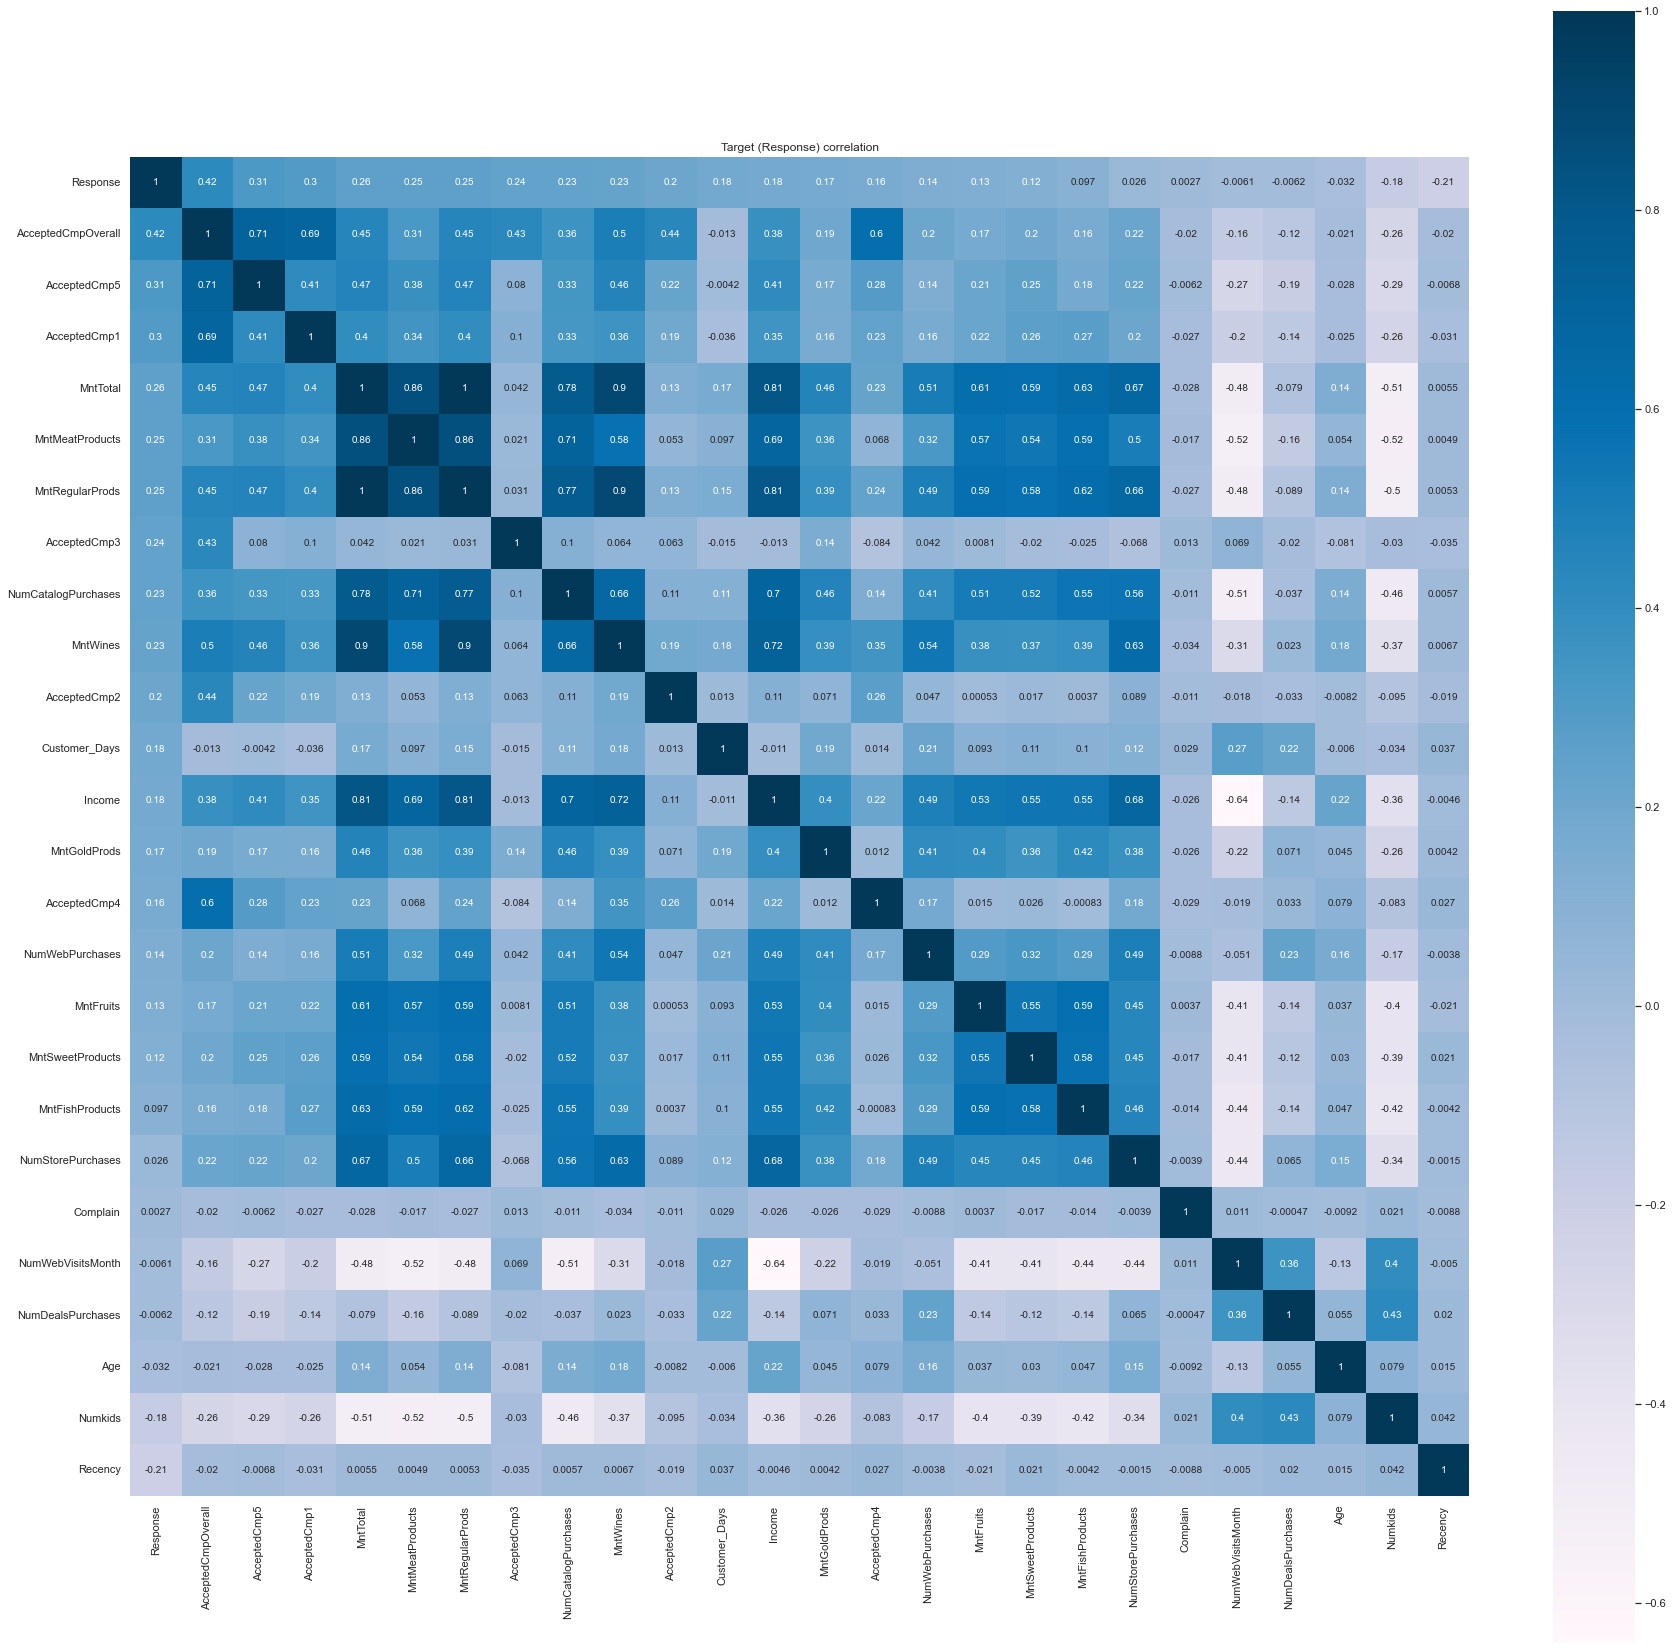

In [36]:
corr_data = Dataset_new[Dataset_new.keys()]
cmap = plt.cm.PuBu
cols = corr_data.corr().nlargest(len(Dataset.keys()),'Response')['Response'].index
cm = np.corrcoef(Dataset_new[cols].values.T)
f,ax = plt.subplots(figsize=(30,30))
plt.title('Target (Response) correlation')
sns.heatmap(cm,vmax=1,annot=True,square=True,xticklabels=cols.values,yticklabels=cols.values,cmap=cmap)
plt.show()

##### The correaltion Matrix exhibits that the income has positive correlation with response, meaning those with higher income are more likely to respond to the campaign. On the other hand, "Age", "NumKids", and "Recency" have negative correlation with the response varaible, reflecting the fact the older people, with higher number of children, and with higher number of days since last purchase are less likely to respond to the campaign. 

## Data Visualization

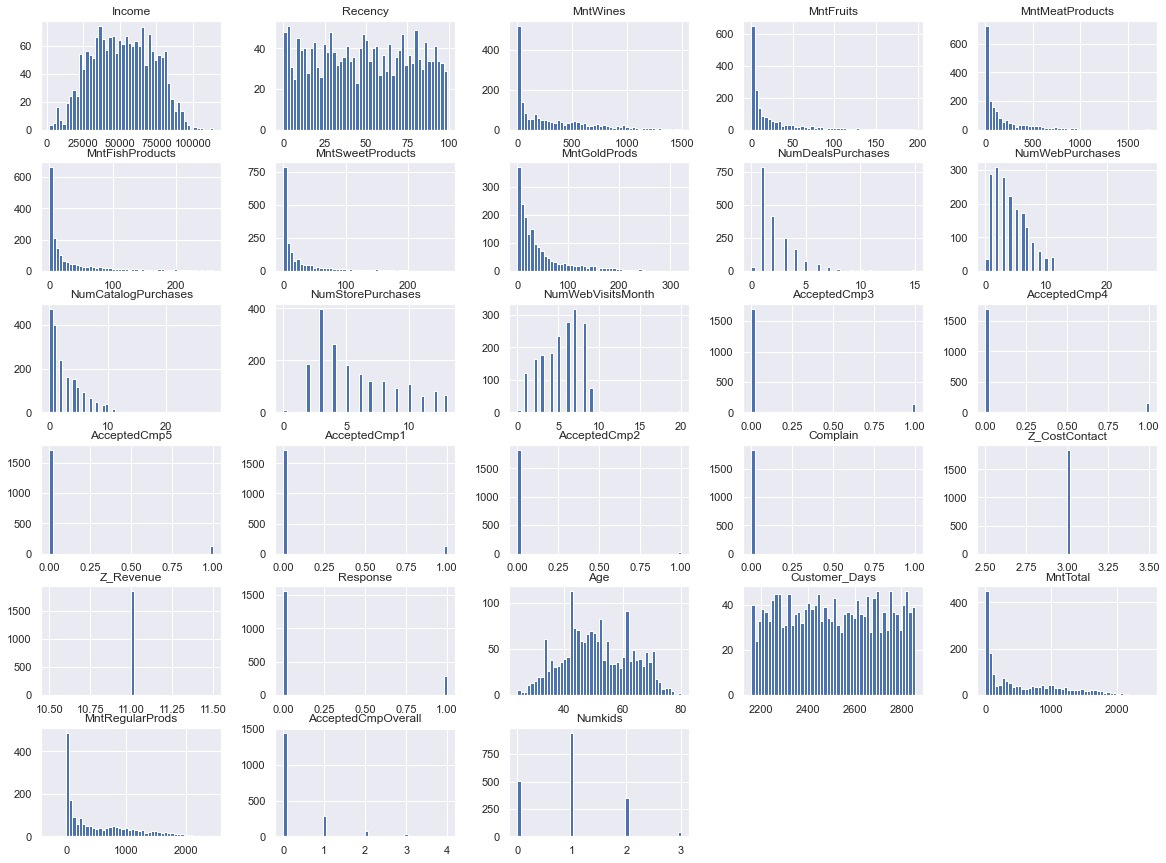

In [28]:
%matplotlib inline 
Dataset_new.hist(bins=50, figsize=(20,15))
plt.show()

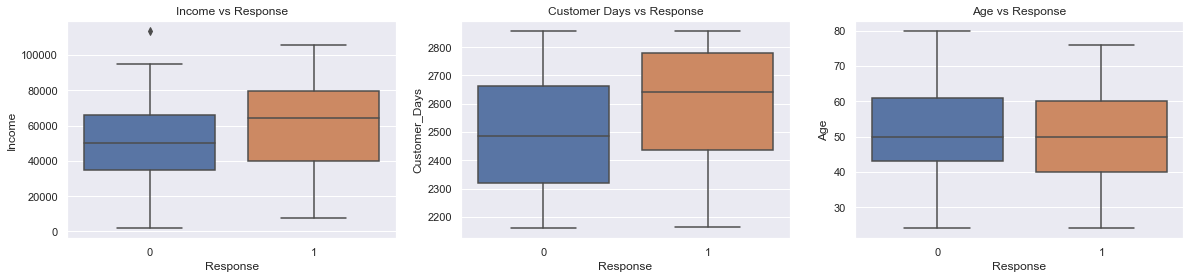

In [31]:
f, axes = plt.subplots(ncols=3, figsize=(20,4))


sns.boxplot(x="Response", y="Income", data=Dataset_new,  ax=axes[0])
axes[0].set_title('Income vs Response')



sns.boxplot(x="Response", y="Customer_Days", data=Dataset_new, ax=axes[1])
axes[1].set_title('Customer Days vs Response')


sns.boxplot(x="Response", y="Age", data=Dataset_new,  ax=axes[2])
axes[2].set_title('Age vs Response')

plt.show()

##### The boxplots above show that on average, those responded to the cmpaign had higher income, higher days as customer, and almost the same age as those who didn't respond.

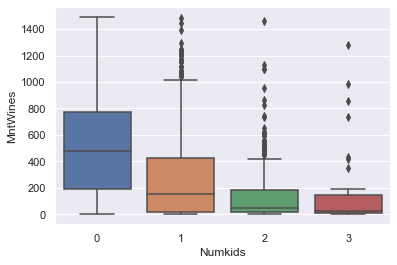

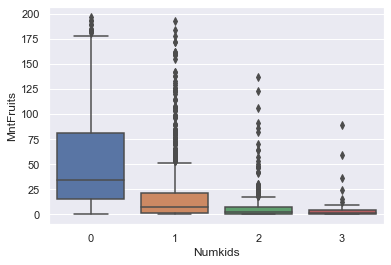

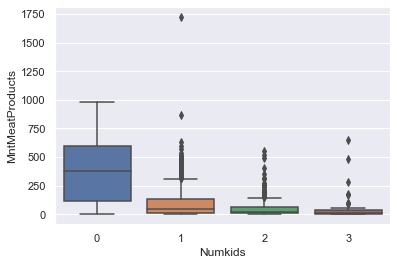

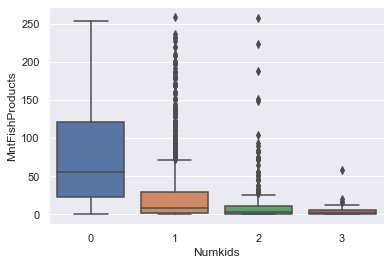

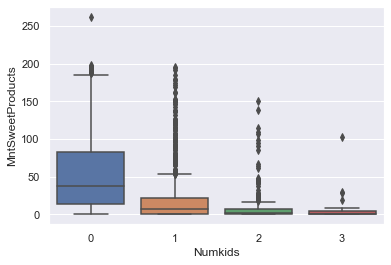

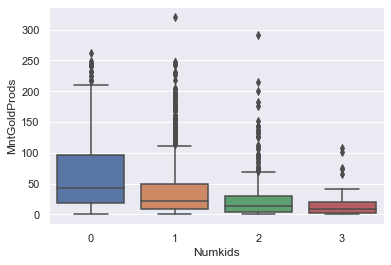

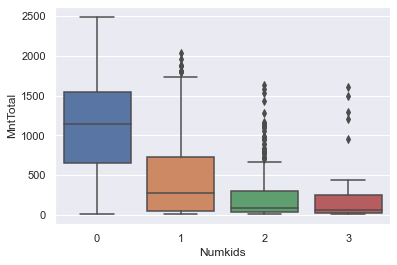

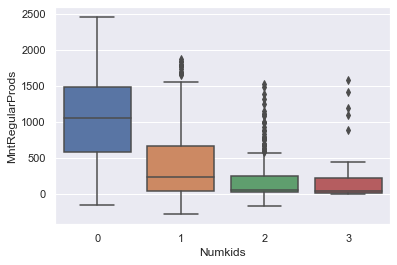

In [50]:
for col in Dataset_new.columns:
    if 'Mnt' in col:
        sns.boxplot(x="Numkids", y=col, data=Dataset_new)
        plt.show()

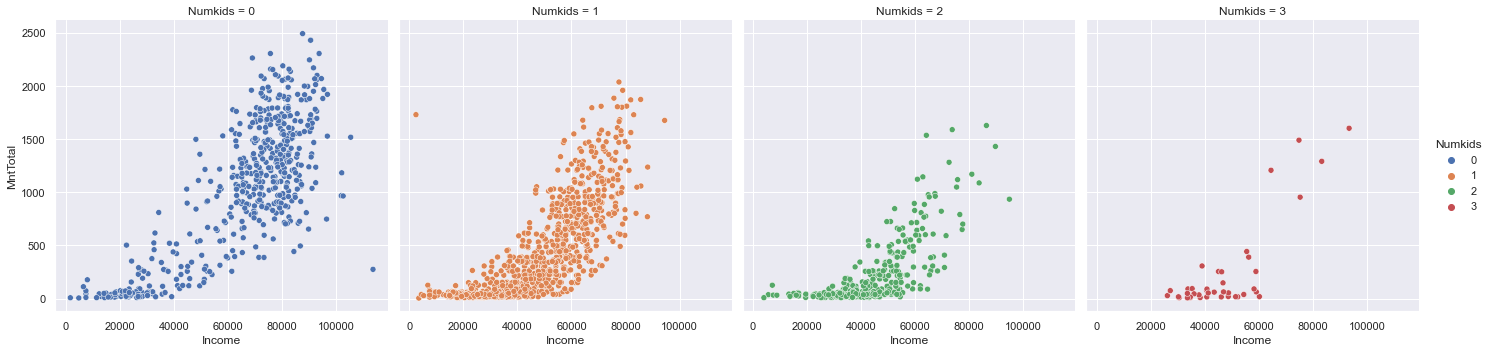

In [35]:
sns.relplot(x="Income", y="MntTotal", data=Dataset_new, col="Numkids",hue="Numkids", kind="scatter",palette="deep")
plt.show()

##### The above plots show that the Income and total amount spent are positively correlated. However, people with lower number of children tend to spend higher as their income increases.

### Performance of Marketing Campaigns

In [42]:
campaigns = pd.DataFrame(Dataset_new[['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3',
                                      'AcceptedCmp4', 'AcceptedCmp5', ]].sum(), columns=['AcceptedOffers']).reset_index()
campaigns.head()

,index,AcceptedOffers
0,AcceptedCmp1,124
1,AcceptedCmp2,22
2,AcceptedCmp3,139
3,AcceptedCmp4,146
4,AcceptedCmp5,132


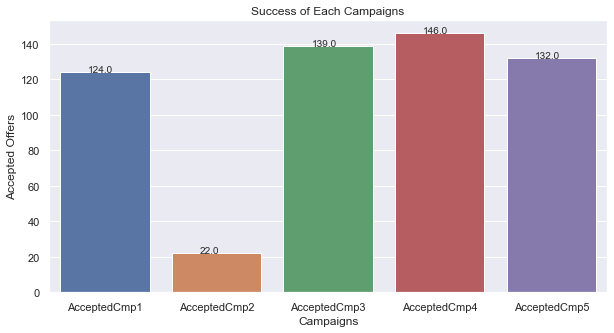

In [43]:
plt.figure(figsize=(10,5))

plt.title('Success of Each Campaigns')

yx = sns.barplot(x='index',y='AcceptedOffers',data=campaigns);
plt.xlabel('Campaigns')
plt.ylabel('Accepted Offers')
for p in yx.patches: 
    yx.annotate('{:}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01)) 
plt.show()

##### It's clear that the campaign 4 was the most successful of all as the number of people accepted the offer has the highest number, followed by Campaign 3 and 5. 

### Revenue Generated by Different Products

In [48]:
revenue = pd.DataFrame(Dataset_new[['MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds']].sum(),columns=['Revenue']).reset_index().sort_values('Revenue' , ascending=False)
revenue

,index,Revenue
0,MntWines,566109
2,MntMeatProducts,307437
5,MntGoldProds,80792
3,MntFishProducts,68930
4,MntSweetProducts,50529
1,MntFruits,48486


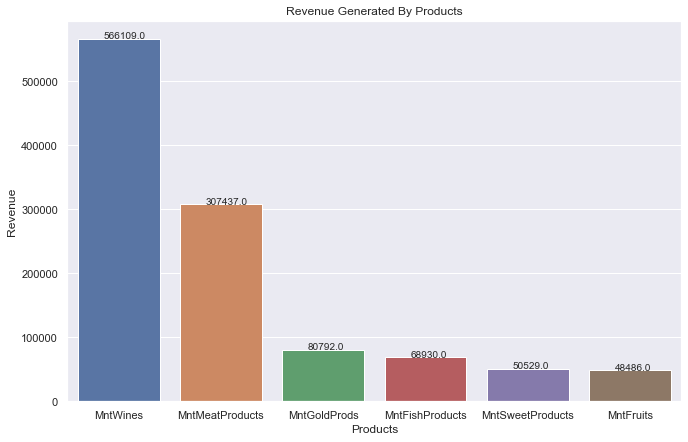

In [49]:
plt.figure(figsize=(11,7))
plt.title("Revenue Generated By Products")
yyx= sns.barplot(x='index',y='Revenue',data=revenue);
plt.xlabel('Products')
plt.ylabel('Revenue')
for p in yyx.patches: 
    yyx.annotate('{:}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01)) 
plt.show()

##### The wines are the most favourite products among customers, followed by meat products, while the fruits are the least favourite products.